## Final Project Submission

Please fill out:
* Student name: Maria Kuzmin
* Student pace: self paced
* Scheduled project review date/time: 
* Instructor name: Morgan Jones
* Blog post URL: tbd


## Don't Roam Buy a Home

The real estate startup “Don’t Roam Buy a Home” (DRBH for short) has contacted us as they are trying to create an app targeted at those who do not feel like they can compete in the current brutal real estate market. DRBH’s application is meant for the normal average person that does not have much knowledge about the real estate market but is trying to understand what would be the best investment given their resources and their needs.

In our business case, DRBH has hired us in order to assist with analyzing raw real estate data and breaking down the trends of the housing market in King County. Their end product centers around having users enter the desired number of bedrooms, bathrooms, the overall residence’s square feet or lot size as well as neighborhood, budget in terms of savings and possible monthly mortgage. With this information the app will provide the user key information to help make the most educated choice and have the most profitable investment with the available funds.

Don't Roam Buy a Home will help users answer some questions like: 
- what is the best neighborhood for me to look into buying a house, given my budget and monthly salary?
- Can I afford an extra bedroom/bathroom or should I save up and add one later on?
- Would it be better to buy a new property or an old run down one and use the extra money to renovate?
- Is this a a good time to buy, given my budget and my salary, or to wait to purchase a house, saving up my monthly salary for a bigger down payment?

These and more are the information that we will be able to provide to the users of the app, starting from our analysis of the King's County Housing Market.

## Looking at the data first

Let's import all the libraries that we are going to need for our analysis.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from random import gauss # these last 3 for cool graphs, not essential
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats as stats
from sklearn.preprocessing import LabelBinarizer
from colorama import Fore
from colorama import Style

%matplotlib inline

The data is provided in the file 

### The Data
This project uses the King County House Sales dataset, which can be found in `kc_house_data.csv` in the data folder in this assignment's GitHub repository. The description of the column names can be found in `column_names.md` in the same folder. As with most real world data sets, the column names are not perfectly described, so you'll have to do some research or use your best judgment if you have questions about what the data means.

It is up to you to decide what data from this dataset to use and how to use it. If you are feeling overwhelmed or behind, we recommend you ignore some or all of the following features:

date
view
sqft_above
sqft_basement
yr_renovated
zipcode
lat
long
sqft_living15
sqft_lot15

### **Column Names and Descriptions for King County Data Set**

- `id` - Unique identifier for a house
- `date` - Date house was sold
- `price` - Sale price (prediction target)
- `bedrooms` - Number of bedrooms
- `bathrooms` - Number of bathrooms
- `sqft_living` - Square footage of living space in the home
- `sqft_lot` - Square footage of the lot
- `floors` - Number of floors (levels) in house
- `waterfront` - Whether the house is on a waterfront
    - Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
- `view` - Quality of view from house
    - Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
- `condition` - How good the overall condition of the house is. Related to maintenance of house.
    - See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each condition code
- `grade` - Overall grade of the house. Related to the construction and design of the house.
    - See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each building grade code
- `sqft_above` - Square footage of house apart from basement
- `sqft_basement` - Square footage of the basement
- `yr_built` - Year when house was built
- `yr_renovated` - Year when house was renovated
- `zipcode` - ZIP Code used by the United States Postal Service
- `lat` - Latitude coordinate
- `long` - Longitude coordinate
- `sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors
- `sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors

In [2]:
df=pd.read_csv('Data/kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
df['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [6]:
df['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [7]:
df['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

ID is a unique identifier therefore not really relevant to our analysis.
Also waterfront and view have very few entries that are not NaN, so I would drop those three columns before running an analysis on the data. Year renovated also has a few entries but I think the information it carries can be very interesting so we are going to keep it for now.
I'll drop also latitude and longitude. In terms of the area for now I am just interested in the zipcode and I will dig later into that. But for now I just want the most relevant variables.

In [8]:
df.drop(['id', 'waterfront', 'view'], axis=1, inplace=True)

What we are interested in in our model is if we can predict the price based on the information we have. So we are going to set y as the price, and X as all the other variables we have and we are going to fit and run a model.

First I need to do one hot encoding before being able to fit a model.
But I guess before that I could do a heatmap and the all graph thingy.

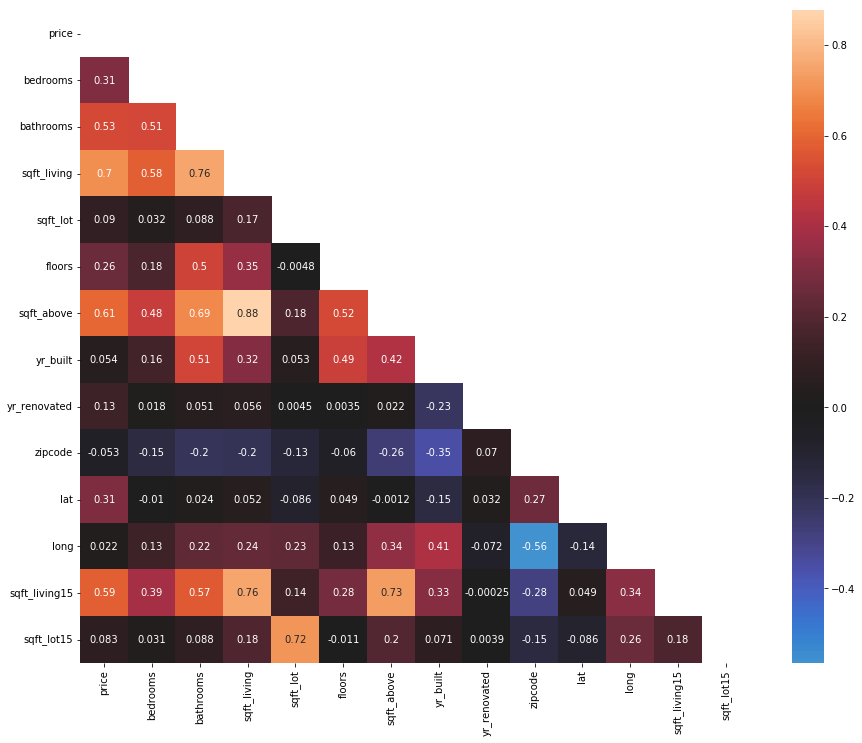

In [9]:
#heat map
import seaborn as sns
fig, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(df.corr(), center=0, ax=ax, annot=True, mask=np.triu(np.ones_like(df.corr(), dtype=bool)),);

In [10]:
#pd.plotting.scatter_matrix(df,figsize  = [12, 12]);
#plt.show()

In [11]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
sqft_above,0.605368,0.479386,0.686668,0.876448,0.184139,0.523989,1.000000,0.424037,0.022137,-0.261570,-0.001199,0.344842,0.731767,0.195077
yr_built,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,0.424037,1.000000,-0.225209,-0.347210,-0.148370,0.409993,0.326377,0.070777
yr_renovated,0.129599,0.018495,0.051050,0.055660,0.004513,0.003535,0.022137,-0.225209,1.000000,0.069846,0.032145,-0.072156,-0.000247,0.003852
zipcode,-0.053402,-0.154092,-0.204786,-0.199802,-0.129586,-0.059541,-0.261570,-0.347210,0.069846,1.000000,0.266742,-0.564259,-0.279299,-0.147294


There are some interesting correlations here.
As we expected especially for number of bedrooms, bathrooms, living sqfootage and sqft above.
Interestingly enough there is also a correlation with the sqft of the houses nearby.
To better understand/explore these correlations we are going to do some data preparation, using one hot encoding and then running a linear regression model and then we will proceed to try to improve our model getting rid of outliers and studying the correlation coefficients. And we will see if that improves our model.

## Clean the data
### Change formats
Some of the data is in the format 'object' and therefore cannot be included in the calculations. In one case, basement sqft it is probably a matter of just changing the format, while other entries like condition and grade are categorical values that need to be translated into something that our model can work with.
This is why we are going to use the method "One Hot Encoding" to change the format of these variables to be able to include them in our calculation. 

In [12]:
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
415.0         1
1275.0        1
2360.0        1
143.0         1
915.0         1
Name: sqft_basement, Length: 304, dtype: int64

Clearly most of the values are numerical, and can be easily turned into a numerical format, while we are going to change the value '?' into zero, as we are not aware of what is the square footage of the basement, it is safer to do this compared to assuming some other value for it.

In [13]:
df['sqft_basement'] = df['sqft_basement'].replace('?','0.0')

In [14]:
df['sqft_basement'] = df['sqft_basement'].astype(float)

In [15]:
df['sqft_basement'].value_counts()

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
915.0         1
295.0         1
1281.0        1
2130.0        1
906.0         1
Name: sqft_basement, Length: 303, dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   condition      21597 non-null  object 
 8   grade          21597 non-null  object 
 9   sqft_above     21597 non-null  int64  
 10  sqft_basement  21597 non-null  float64
 11  yr_built       21597 non-null  int64  
 12  yr_renovated   17755 non-null  float64
 13  zipcode        21597 non-null  int64  
 14  lat            21597 non-null  float64
 15  long           21597 non-null  float64
 16  sqft_living15  21597 non-null  int64  
 17  sqft_lot15     21597 non-null  int64  
dtypes: flo

Some other columns are actually numerical but need to be converted into that. Like "grade" has actually a number representing it but because it is followed also by a string its format is object.
Let us take care of that.

In [17]:
df['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [18]:
# Creating a dictionary using which we will remap the values
dict = {'7 Average' : 7,'8 Good': 8,'9 Better':9,'6 Low Average':6,'10 Very Good':10,'11 Excellent':11,'5 Fair':5,\
        '12 Luxury':12,'4 Low':4,'13 Mansion':13 ,'3 Poor':3}
 
# Remap the values of the dataframe
df=df.replace({"grade": dict})

In [19]:
df['grade'] = df['grade'].astype(float)

Now let us explore the column 'condition'. Maybe we can also replace that easily with numerical values

In [20]:
df['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

From the reference that has been given to us (https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) it is clear that the values for condition are to be interepreted as follows:
Relative to age and grade. Coded 1-5.

1 = Poor

2 = Fair

3 = Average

4 = Good

5= Very Good

We will then translate those values in the same way

In [21]:
dict = {'Poor':1, 'Fair':2, 'Average': 3,'Good': 4,'Very Good':5}
 
# Remap the values of the dataframe
df=df.replace({"condition": dict})

In [22]:
df['condition'].value_counts()

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   condition      21597 non-null  int64  
 8   grade          21597 non-null  float64
 9   sqft_above     21597 non-null  int64  
 10  sqft_basement  21597 non-null  float64
 11  yr_built       21597 non-null  int64  
 12  yr_renovated   17755 non-null  float64
 13  zipcode        21597 non-null  int64  
 14  lat            21597 non-null  float64
 15  long           21597 non-null  float64
 16  sqft_living15  21597 non-null  int64  
 17  sqft_lot15     21597 non-null  int64  
dtypes: flo

### Handling missing values

As we can see the columns that have missing values are 'waterfront', 'view' and 'year renovated'.
There are clear reasons for some values to be missing as not all of the houses have a waterfront or information about the view,
and not all the houses were renovated. We will use that information later and separately, but for now we are not going to include these variables in our model so there is not need to worry about them.

In [24]:
df['price'].value_counts()

350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64

In [25]:
df.isnull().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

## Preliminary Regression Model

Running a linear regression here before one hot encoding (not sure I will keep it but let's try)

In [93]:
y=df['price']
X=df.drop(['price', 'date', 'yr_renovated'], axis=1)

linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression()

In [94]:
linreg.coef_

array([-5.07835501e+04,  4.91267249e+04,  1.28223210e+02,  1.41495671e-01,
        1.97662184e+04,  2.55069266e+04,  1.01930726e+05,  6.02890483e+01,
        5.36503801e+01, -2.99418450e+03, -4.97632722e+02,  5.45452589e+05,
       -2.42291471e+05,  4.07279039e+01, -3.40039016e-01])

In [95]:
linreg.intercept_

-1600211.1076751743

In [96]:
R2=metrics.r2_score(y,linreg.predict(X))
print(f"{Fore.CYAN} The R squared value for this Preliminary Regression model is {Style.RESET_ALL}", R2) 

 The R squared value for this Preliminary Regression model is  0.663044176948024


In [99]:
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     2831.
Date:                Wed, 02 Nov 2022   Prob (F-statistic):               0.00
Time:                        16:12:25   Log-Likelihood:            -2.9563e+05
No. Observations:               21596   AIC:                         5.913e+05
Df Residuals:                   21580   BIC:                         5.914e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -1.6e+06   3.09e+06     -0.519      0.604   -7.65e+06    4.45e+06
bedrooms      -5.078e+04   2072.493    -24.504      0.000   -5.48e+04   -4.67e+04
bathrooms      4.913e+04   2897.759     16.953      0.000    4.34e+04    5.48e+04
sqft_living     128.2232     19.119      6.707      0.000      90.749     165.698
sqft_lot          0.1415      0.051      2.787      0.005       0.042       0.241
floors         1.977e+04   3692.721      5.353      0.000    1.25e+04     2.7e+04
condition      2.551e+04   2456.952     10.382      0.000    2.07e+04    3.03e+04
grade          1.019e+05   2282.410     44.659      0.000    9.75e+04    1.06e+05
sqft_above       60.2890     19.128      3.152      0.002      22.796      97.782
sqft_basement    53.6504     18.978      2.827      0.005      16.452      90.849
yr_built      -2994.1845     70.539    -42.447      0.000   -3132.447   -2855.922
zipcode        -497.6327     34.812    -14.295      0.000    -565.867    -429.398
lat            5.455e+05   1.13e+04     48.195      0.000    5.23e+05    5.68e+05
long          -2.423e+05   1.39e+04    -17.399      0.000    -2.7e+05   -2.15e+05
sqft_living15    40.7279      3.614     11.268      0.000      33.644      47.812
sqft_lot15       -0.3400      0.078     -4.375      0.000      -0.492      -0.188
==============================================================================
Omnibus:                    19378.014   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1917157.972
Skew:                           3.919   Prob(JB):                         0.00
Kurtosis:                      48.488   Cond. No.                     2.14e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.14e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## One Hot Encoding

One Hot Encoding is a method that allows us to transform categorical variables into numerical ones to be able to better include them in our model.
Some variables that are for sure categorical are the number of bedrooms and bathrooms and floors.
And we are also going to transform the information about when the house was renovated into a binary selection, whether the house was renovated or not.

In [31]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,3,7.0,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,3,7.0,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,3,6.0,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,5,7.0,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,3,8.0,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,5/21/2014,360000.0,3,2.50,1530,1131,3.0,3,8.0,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,2/23/2015,400000.0,4,2.50,2310,5813,2.0,3,8.0,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,6/23/2014,402101.0,2,0.75,1020,1350,2.0,3,7.0,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,1/16/2015,400000.0,3,2.50,1600,2388,2.0,3,8.0,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


The numbers of bathrooms are not integers, but divided in different ways whether there is a toilet or a sink or a shower...
This with one hot encoding would lead us to have A LOT of columns and also correlation will be more confusing to interpret. So to make this a little simpler I am going to round them up for simplicity.

In [32]:
#Rounding up number of bathrooms

df['bathrooms']=df['bathrooms'].round(0)
df['bathrooms'].value_counts()

2.0    13847
1.0     3931
3.0     2527
4.0     1201
5.0       57
6.0       24
8.0        4
0.0        4
7.0        2
Name: bathrooms, dtype: int64

In [33]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Categorical columns
cat_columns = ['bedrooms', 'bathrooms', 'floors']

# Fit encoder on training set
ohe.fit(df[cat_columns])

# Get new column names
new_cat_columns = ohe.get_feature_names(input_features=cat_columns)

# Transform training set
df_cat = pd.DataFrame(ohe.fit_transform(df[cat_columns]),
                           columns=new_cat_columns, index=df.index)

# Replace training columns with transformed versions
ohe_df = pd.concat([df.drop(cat_columns, axis=1), df_cat], axis=1)
ohe_df

,date,price,sqft_living,sqft_lot,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,...,bathrooms_5.0,bathrooms_6.0,bathrooms_7.0,bathrooms_8.0,floors_1.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5
0,10/13/2014,221900.0,1180,5650,3,7.0,1180,0.0,1955,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,12/9/2014,538000.0,2570,7242,3,7.0,2170,400.0,1951,1991.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2/25/2015,180000.0,770,10000,3,6.0,770,0.0,1933,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,12/9/2014,604000.0,1960,5000,5,7.0,1050,910.0,1965,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,2/18/2015,510000.0,1680,8080,3,8.0,1680,0.0,1987,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,5/21/2014,360000.0,1530,1131,3,8.0,1530,0.0,2009,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
21593,2/23/2015,400000.0,2310,5813,3,8.0,2310,0.0,2014,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
21594,6/23/2014,402101.0,1020,1350,3,7.0,1020,0.0,2009,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
21595,1/16/2015,400000.0,1600,2388,3,8.0,1600,0.0,2004,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [34]:
ohe_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 42 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   sqft_living    21597 non-null  int64  
 3   sqft_lot       21597 non-null  int64  
 4   condition      21597 non-null  int64  
 5   grade          21597 non-null  float64
 6   sqft_above     21597 non-null  int64  
 7   sqft_basement  21597 non-null  float64
 8   yr_built       21597 non-null  int64  
 9   yr_renovated   17755 non-null  float64
 10  zipcode        21597 non-null  int64  
 11  lat            21597 non-null  float64
 12  long           21597 non-null  float64
 13  sqft_living15  21597 non-null  int64  
 14  sqft_lot15     21597 non-null  int64  
 15  bedrooms_1     21597 non-null  float64
 16  bedrooms_2     21597 non-null  float64
 17  bedrooms_3     21597 non-null  float64
 18  bedroo

## Ohe Linear Regression Model
We are ready now for our first linear regression model!
Let us run it, and we are going to keep all the possible variables, with only the essential exceptions.
We are going to be excluding view and waterfront, since they have a lot of missing values therefore they describe a small part of the data anyway. 
The variables date, year renovated, zipcode, latitude and longitude are numerical but because of their particular meaning I am going to treat them separately later on to do a more in depth analysis about them.

In [35]:
y=ohe_df['price']
X=ohe_df.drop(['price', 'date','yr_renovated'], axis=1)

linreg= LinearRegression()
linreg.fit(X,y)

LinearRegression()

In [36]:
#X.columns

In [37]:
#linreg.coef_

In [38]:
#linreg.intercept_

In [39]:
R2= metrics.r2_score(y,linreg.predict(X))
print(f"{Fore.BLUE} The R squared value for this model done after One-Hot-Encoding is {Style.RESET_ALL}", R2) 

 The R squared value for this model done after One-Hot-Encoding is  0.6831990089433897


Running the same model but with statsmodel to have more information

In [40]:
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     1292.
Date:                Wed, 02 Nov 2022   Prob (F-statistic):               0.00
Time:                        15:23:29   Log-Likelihood:            -2.9498e+05
No. Observations:               21597   AIC:                         5.900e+05
Df Residuals:                   21560   BIC:                         5.903e+05
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
sqft_living     110.1687     18.585      5.928      0.000      73.740     146.598
sqft_lot          0.1330      0.049      2.698      0.007       0.036       0.230
condition      3.158e+04   2405.178     13.130      0.000    2.69e+04    3.63e+04
grade          1.068e+05   2233.594     47.814      0.000    1.02e+05    1.11e+05
sqft_above       50.1122     18.616      2.692      0.007      13.623      86.601
sqft_basement    58.0151     18.433      3.147      0.002      21.885      94.145
yr_built      -2670.9430     76.036    -35.127      0.000   -2819.980   -2521.906
zipcode        -513.2521     33.875    -15.151      0.000    -579.650    -446.854
lat            5.376e+05   1.11e+04     48.604      0.000    5.16e+05    5.59e+05
long          -2.171e+05   1.36e+04    -15.926      0.000   -2.44e+05    -1.9e+05
sqft_living15    56.6105      3.557     15.916      0.000      49.639      63.582
sqft_lot15       -0.3891      0.076     -5.153      0.000      -0.537      -0.241
bedrooms_1      9.34e+05   6.97e+05      1.340      0.180   -4.33e+05     2.3e+06
bedrooms_2     8.959e+05   6.97e+05      1.285      0.199   -4.71e+05    2.26e+06
bedrooms_3     8.504e+05   6.97e+05      1.220      0.222   -5.16e+05    2.22e+06
bedrooms_4     8.015e+05   6.97e+05      1.150      0.250   -5.64e+05    2.17e+06
bedrooms_5     7.926e+05   6.97e+05      1.138      0.255   -5.73e+05    2.16e+06
bedrooms_6     7.378e+05   6.97e+05      1.059      0.290   -6.28e+05     2.1e+06
bedrooms_7     5.632e+05   6.97e+05      0.808      0.419   -8.04e+05    1.93e+06
bedrooms_8     7.919e+05   6.98e+05      1.134      0.257   -5.77e+05    2.16e+06
bedrooms_9     2.481e+05   7.01e+05      0.354      0.723   -1.13e+06    1.62e+06
bedrooms_10    5.642e+05   7.04e+05      0.801      0.423   -8.16e+05    1.94e+06
bedrooms_11    5.936e+05   7.22e+05      0.822      0.411   -8.22e+05    2.01e+06
bedrooms_33    9.474e+05   7.24e+05      1.309      0.191   -4.71e+05    2.37e+06
bathrooms_0.0  3.794e+05   9.34e+05      0.406      0.685   -1.45e+06    2.21e+06
bathrooms_1.0  4.563e+05   9.28e+05      0.491      0.623   -1.36e+06    2.28e+06
bathrooms_2.0  4.332e+05   9.28e+05      0.467      0.641   -1.39e+06    2.25e+06
bathrooms_3.0  4.719e+05   9.28e+05      0.508      0.611   -1.35e+06    2.29e+06
bathrooms_4.0  5.703e+05   9.29e+05      0.614      0.539   -1.25e+06    2.39e+06
bathrooms_5.0  1.011e+06   9.29e+05      1.088      0.276   -8.09e+05    2.83e+06
bathrooms_6.0  1.399e+06   9.29e+05      1.505      0.132   -4.23e+05    3.22e+06
bathrooms_7.0  1.301e+06   9.38e+05      1.387      0.165   -5.37e+05    3.14e+06
bathrooms_8.0  2.699e+06   9.35e+05      2.888      0.004    8.67e+05    4.53e+06
floors_1.0     1.375e+06   1.39e+06      0.988      0.323   -1.35e+06     4.1e+06
floors_1.5     1.384e+06   1.39e+06      0.995   

Before doing a train-test split and doing cross validation for our model, let's try to improve the model increasing the R squared and once we have the best one we will run the cross validation too.

## Trying to improve my model
We are going now to take several different steps to try to improve this first linear regression model.
We already took care of the categorical variables with one hot encoding.
Now it is time to work on the continuous ones, and we will first normalize them and then scale them, whenever necessary.

### Transforming the variables, normalizing and scaling them
The easiest way to see this is by plotting histograms that can show us visually which variables are already pretty normalized and which ones would need a transformation and have heavy outliers.

The continuous variables on which I chose to focus on so far are: sqft_living, sqft_lot, sqft_above, sqft_basement, yr_built, sqftliving_15 and sqft_lot_15.

In [41]:
cols=['sqft_living', 'sqft_lot', 'sqft_above','sqft_basement', 'yr_built', 'sqft_living15',
       'sqft_lot15']

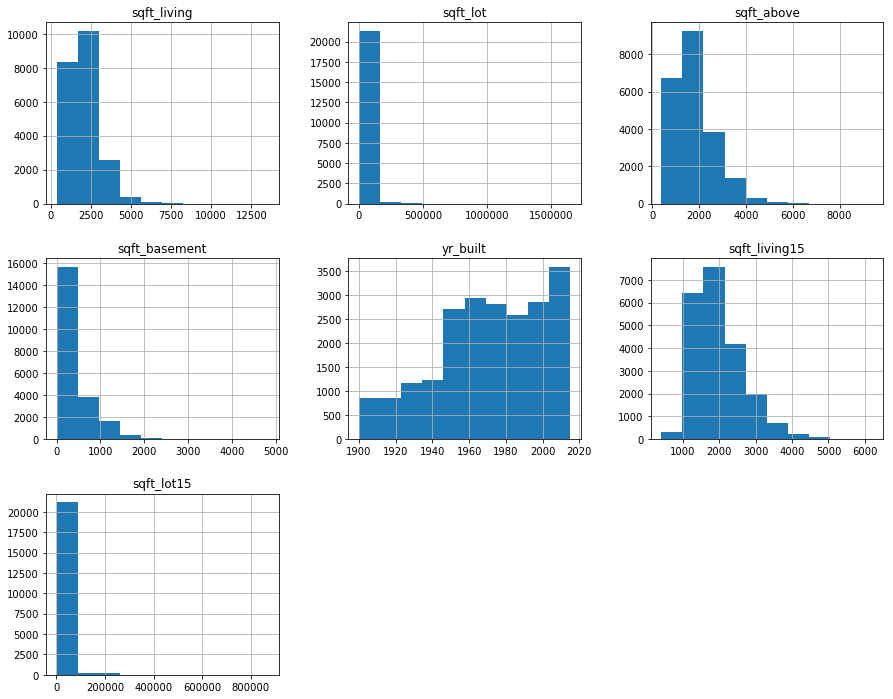

In [42]:
df[cols].hist(figsize  = [15,12]); 

From what I can observe, squarefoot living, squarefoot lot, sqft above, sqft living 15 and squarefoot lot 15 probably have very heavy outliers, and could probably also beneficiate from logarythmic normalization.
Bedrooms also probably has an outlier that might be cause by a typo.
Sqft basement, Sqft lot and Sqft lot15 are also not following a normal distribution but they seem to be zero-inflated variables which is complicated to work with.

In [43]:
df['sqft_basement'].value_counts(normalize=True)

0.0       0.614900
600.0     0.010048
500.0     0.009677
700.0     0.009631
800.0     0.009307
            ...   
915.0     0.000046
295.0     0.000046
1281.0    0.000046
2130.0    0.000046
906.0     0.000046
Name: sqft_basement, Length: 303, dtype: float64

As expected, there are a lot of zeros for these variables.
It was probably classified this way when there is simply no basement in the house. But I also don't want to drop all the columns with no basement, since 13280 is a consistent number and I don't want to lose all of that information.
<br>I will leave it as is for now and select the features which don't have this characteristic.

### Outliers
<br>I want to inspect the bedroom variable and then we will move on to scaling.

In [44]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

Yes, 33 seems like a typo so we will just remove that.

In [45]:
df.drop(df.loc[df['bedrooms']==33].index, inplace=True) #let's remove it from our original data frame
ohe_df.drop('bedrooms_33', axis=1, inplace=True)# and also form the one hot encoding one

In [46]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

### Transformations

In [47]:
df_log=pd.DataFrame()
non_normal = ['sqft_living', 'sqft_above', 'sqft_living15']
for feat in non_normal:
    df_log[feat] = df[feat].map(lambda x: np.log(x))
df_log = df_log.add_suffix('_log')

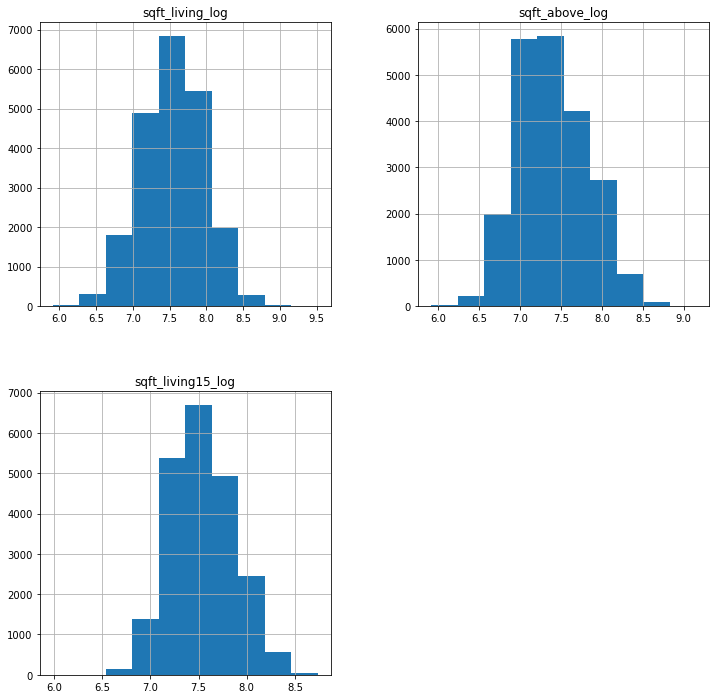

In [48]:
df_log.hist(figsize  = [12,12]); 

The values are a little more normal now. 

## Scaling

I am not certain whether min-max scaling or normalization is a better option. So I am going to try to transform all the variables with one and then the other, and see which one brins the better results.

### Min Max Scaling

In the min max scaling each value gets the min subtracted and is divided by the difference between the max and the min of that variable.
In this way all the values fall between 0 and 1.

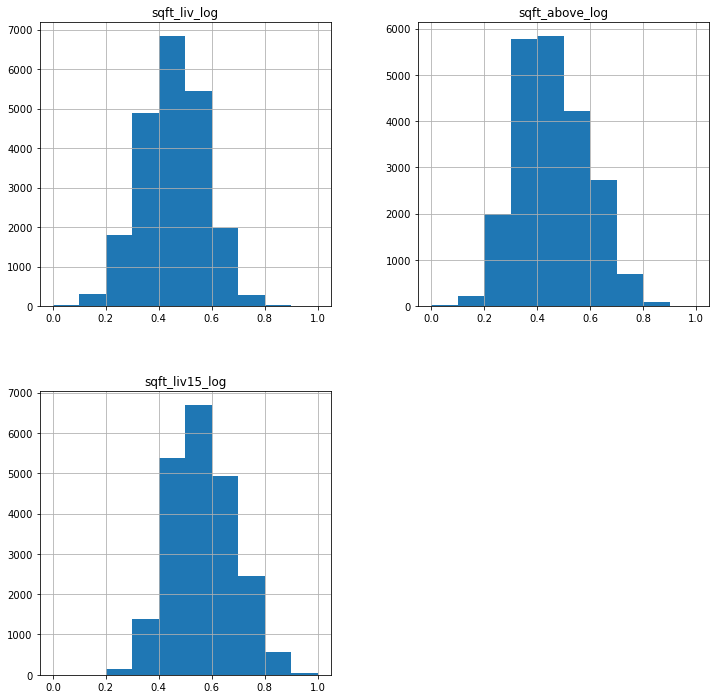

In [49]:
### Before this code block add the formula of the min max scaler in formula version
sqll = df_log['sqft_living_log']
sqal  = df_log['sqft_above_log']
sq1v15 = df_log['sqft_living15_log']

scaled_sqll = (sqll - min(sqll)) / (max(sqll) - min(sqll))
scaled_sqal = (sqal - min(sqal)) / (max(sqal) - min(sqal))
scaled_sq1v15 = (sq1v15 - min(sq1v15)) / (max(sq1v15) - min(sq1v15))

data_cont_mmscaled = pd.DataFrame([])
data_cont_mmscaled['sqft_liv_log'] = scaled_sqll
data_cont_mmscaled['sqft_above_log'] = scaled_sqal
data_cont_mmscaled['sqft_liv15_log'] = scaled_sq1v15

data_cont_mmscaled.hist(figsize = [12, 12]);

In [50]:
mmscaled_df=pd.concat([ohe_df,data_cont_mmscaled], axis=1)

In [51]:
mmscaled_df.head()

,date,price,sqft_living,sqft_lot,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,...,bathrooms_8.0,floors_1.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,sqft_liv_log,sqft_above_log,sqft_liv15_log
0,10/13/2014,221900.0,1180,5650,3,7.0,1180,0.0,1955,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.322166,0.358392,0.441342
1,12/9/2014,538000.0,2570,7242,3,7.0,2170,400.0,1951,1991.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.538392,0.546652,0.525882
2,2/25/2015,180000.0,770,10000,3,6.0,770,0.0,1933,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.203585,0.226478,0.699256
3,12/9/2014,604000.0,1960,5000,5,7.0,1050,910.0,1965,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.463123,0.322322,0.446739
4,2/18/2015,510000.0,1680,8080,3,8.0,1680,0.0,1987,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.420302,0.467563,0.548854


At this point I can drop the columns that I transformed and scaled

In [52]:
mmscaled_df.drop(['sqft_living', 'sqft_above', 'sqft_living15'], axis=1, inplace=True)
mmscaled_df = mmscaled_df.dropna() # I checked and the NA values are only 3, I'll get rid of them now or they will
#Give me trouble with the fit

In [73]:
mmscaled_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17754 entries, 0 to 21596
Data columns (total 41 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            17754 non-null  object 
 1   price           17754 non-null  float64
 2   sqft_lot        17754 non-null  int64  
 3   condition       17754 non-null  int64  
 4   grade           17754 non-null  float64
 5   sqft_basement   17754 non-null  float64
 6   yr_built        17754 non-null  int64  
 7   yr_renovated    17754 non-null  float64
 8   zipcode         17754 non-null  int64  
 9   lat             17754 non-null  float64
 10  long            17754 non-null  float64
 11  sqft_lot15      17754 non-null  int64  
 12  bedrooms_1      17754 non-null  float64
 13  bedrooms_2      17754 non-null  float64
 14  bedrooms_3      17754 non-null  float64
 15  bedrooms_4      17754 non-null  float64
 16  bedrooms_5      17754 non-null  float64
 17  bedrooms_6      17754 non-null 

### MinMax Scaler Linear Regression

Let us try a linear regression with this scaling, and then I will do it again with the normal scaling and we can compare the results.

In [53]:
y=mmscaled_df['price']
X=mmscaled_df.drop(['price', 'date', 'yr_renovated'], axis=1)

linreg= LinearRegression()
linreg.fit(X,y)

LinearRegression()

In [54]:
R2=metrics.r2_score(y,linreg.predict(X))
print(f"{Fore.MAGENTA} The R squared value for this model scaled with MinMaxScaling is {Style.RESET_ALL}", R2) 

 The R squared value for this model scaled with MinMaxScaling is  0.6680329311758564


Now next things to do go back to your old project and find the way to color the code, and then try to normal scaling.

### Normalizing instead of min max scaling

Instead of using the MinMax scaler I am going to use a normalizer, which substracts the value from the mean and divides by the standard deviation.
The features scaled this way are centered around zero and have a standard deviation of 1.

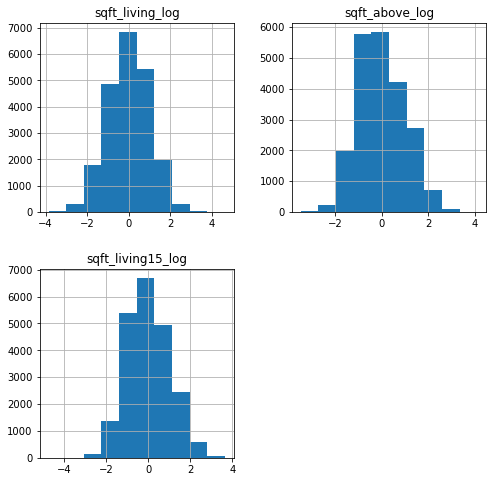

In [55]:
### Before this block, write out the formula, in formula format, of the normal scaler
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

data_cont_norm = df_log.apply(normalize)
data_cont_norm.hist(figsize  = [8, 8]);

In [56]:
norm_df=pd.concat([ohe_df,data_cont_norm], axis=1)

In [57]:
norm_df.drop(['sqft_living', 'sqft_above', 'sqft_living15'], axis=1, inplace=True)
norm_df = norm_df.dropna()

In [74]:
norm_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17754 entries, 0 to 21596
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               17754 non-null  object 
 1   price              17754 non-null  float64
 2   sqft_lot           17754 non-null  int64  
 3   condition          17754 non-null  int64  
 4   grade              17754 non-null  float64
 5   sqft_basement      17754 non-null  float64
 6   yr_built           17754 non-null  int64  
 7   yr_renovated       17754 non-null  float64
 8   zipcode            17754 non-null  int64  
 9   lat                17754 non-null  float64
 10  long               17754 non-null  float64
 11  sqft_lot15         17754 non-null  int64  
 12  bedrooms_1         17754 non-null  float64
 13  bedrooms_2         17754 non-null  float64
 14  bedrooms_3         17754 non-null  float64
 15  bedrooms_4         17754 non-null  float64
 16  bedrooms_5         177

In [58]:
y=norm_df['price']
X=norm_df.drop(['price', 'date', 'yr_renovated'], axis=1)

linreg= LinearRegression()
linreg.fit(X,y)

LinearRegression()

In [59]:
R2=metrics.r2_score(y,linreg.predict(X))
print(f"{Fore.GREEN} The R squared value for this model scaled with Normal Scaler is {Style.RESET_ALL}", R2) 

 The R squared value for this model scaled with Normal Scaler is  0.6680329311758566


How interesting! The two different scaling give us a very similar R squared value, with the same exact numbers up until the sixth decimal position!
Also R squared has not really improved, it has actually slightly decreased form the scaling and normalization.
But there is still more improving that we can do for the model!

Next I would like to check for multicollinearity and try to drop the variables that have p>0.05, and see if in that way the model improves.

## Multicollinearity

In [60]:
#norm_df.info()

In [61]:
#pd.plotting.scatter_matrix(norm_df,figsize  = [15,15]);
#plt.show()

In [62]:
norm_df.corr()

,price,sqft_lot,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,...,bathrooms_8.0,floors_1.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,sqft_living_log,sqft_above_log,sqft_living15_log
price,1.000000,0.086074,0.032949,0.664504,0.319843,0.050256,0.129603,-0.052439,0.306066,0.020926,...,0.154034,-0.261084,0.014384,0.229504,0.131240,0.019102,0.021277,0.611286,0.542655,0.542390
sqft_lot,0.086074,1.000000,-0.009608,0.108788,0.019563,0.048692,0.004511,-0.129647,-0.085203,0.232744,...,0.027816,-0.009308,0.010397,0.019203,0.003690,-0.047966,-0.005346,0.145450,0.157232,0.146158
condition,0.032949,-0.009608,1.000000,-0.149628,0.162592,-0.365949,-0.061840,0.004639,-0.017034,-0.106684,...,-0.003694,0.211917,0.142960,-0.270522,0.009865,-0.096006,-0.002175,-0.056031,-0.154295,-0.092423
grade,0.664504,0.108788,-0.149628,1.000000,0.166646,0.444993,0.016663,-0.185005,0.114012,0.200788,...,0.046002,-0.425546,-0.128138,0.469719,0.095558,0.073929,0.015780,0.743928,0.743780,0.692243
sqft_basement,0.319843,0.019563,0.162592,0.166646,1.000000,-0.129812,0.071199,0.070592,0.107610,-0.140561,...,0.063728,0.241267,-0.020929,-0.211696,0.021191,-0.082406,-0.000703,0.418480,-0.049840,0.207794
yr_built,0.050256,0.048692,-0.365949,0.444993,-0.129812,1.000000,-0.225224,-0.345201,-0.146994,0.408435,...,0.002757,-0.352979,-0.388318,0.529616,-0.034053,0.193947,0.010581,0.348081,0.449379,0.330919
yr_renovated,0.129603,0.004511,-0.061840,0.016663,0.071199,-0.225224,1.000000,0.069852,0.032157,-0.072168,...,0.015506,-0.022511,0.045797,-0.001107,0.037602,-0.026650,-0.003845,0.051415,0.024978,-0.003579
zipcode,-0.052439,-0.129647,0.004639,-0.185005,0.070592,-0.345201,0.069852,1.000000,0.264259,-0.562973,...,0.001890,0.058389,0.144132,-0.183613,0.026590,0.102223,0.010394,-0.223640,-0.290505,-0.292558
lat,0.306066,-0.085203,-0.017034,0.114012,0.107610,-0.146994,0.032157,0.264259,1.000000,-0.134486,...,0.007663,-0.037696,0.071130,-0.046154,0.018655,0.117893,0.010480,0.041749,-0.015044,0.041013
long,0.020926,0.232744,-0.106684,0.200788,-0.140561,0.408435,-0.072168,-0.562973,-0.134486,1.000000,...,0.000102,-0.144835,-0.137693,0.278403,-0.020093,-0.133946,-0.014993,0.258483,0.362585,0.340884


In [63]:
abs(norm_df.corr()) > 0.75

,price,sqft_lot,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,...,bathrooms_8.0,floors_1.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,sqft_living_log,sqft_above_log,sqft_living15_log
price,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_lot,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
condition,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
grade,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_basement,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
yr_built,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
yr_renovated,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
zipcode,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
lat,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
long,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [64]:
df_cc=norm_df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df_cc['pairs'] = list(zip(df_cc.level_0, df_cc.level_1))

# set index to pairs
df_cc.set_index(['pairs'], inplace = True)

#drop level columns
df_cc.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df_cc.columns = ['cc']

In [65]:
df_cc.drop_duplicates(inplace=True)
df_cc[(df_cc.cc>.75) & (df_cc.cc <1)]

,cc
pairs,
"(sqft_above_log, sqft_living_log)",0.864459
"(floors_2.0, floors_1.0)",0.777444
"(sqft_living_log, sqft_living15_log)",0.750127


It looks like squarefoot living and squarefoot about are strongly correlated and that makes sense.
1 floor and 2 floors are too, as we know from one hot encoding when we are supposed to drop the first column to avoid multicollineairty.
So I will drop these two columns in the next model.
Let me also check the same linear model we just did, but doing it with statsmodel to see the coefficients, so to drop the ones that have p>0.05

### P values, F-statistic 

Same model that we ran right after ohe, doing it with statsmodel to see the coefficients.

In [102]:
y=ohe_df['price']
X=ohe_df.drop(['price', 'date', 'yr_renovated'], axis=1)
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     1292.
Date:                Wed, 02 Nov 2022   Prob (F-statistic):               0.00
Time:                        16:14:01   Log-Likelihood:            -2.9498e+05
No. Observations:               21597   AIC:                         5.900e+05
Df Residuals:                   21560   BIC:                         5.903e+05
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.637e+06   2.37e+06      1.114      0.265      -2e+06    7.28e+06
sqft_living     110.1687     18.585      5.928      0.000      73.740     146.598
sqft_lot          0.1330      0.049      2.698      0.007       0.036       0.230
condition      3.158e+04   2405.178     13.130      0.000    2.69e+04    3.63e+04
grade          1.068e+05   2233.594     47.814      0.000    1.02e+05    1.11e+05
sqft_above       50.1122     18.616      2.692      0.007      13.623      86.601
sqft_basement    58.0151     18.433      3.147      0.002      21.885      94.145
yr_built      -2670.9430     76.036    -35.127      0.000   -2819.980   -2521.906
zipcode        -513.2521     33.875    -15.151      0.000    -579.650    -446.854
lat            5.376e+05   1.11e+04     48.604      0.000    5.16e+05    5.59e+05
long          -2.171e+05   1.36e+04    -15.926      0.000   -2.44e+05    -1.9e+05
sqft_living15    56.6105      3.557     15.916      0.000      49.639      63.582
sqft_lot15       -0.3891      0.076     -5.153      0.000      -0.537      -0.241
bedrooms_1    -1.332e+04   2.08e+05     -0.064      0.949    -4.2e+05    3.94e+05
bedrooms_2    -5.146e+04   2.07e+05     -0.249      0.804   -4.57e+05    3.54e+05
bedrooms_3    -9.699e+04   2.07e+05     -0.469      0.639   -5.03e+05    3.09e+05
bedrooms_4    -1.459e+05   2.07e+05     -0.705      0.481   -5.52e+05     2.6e+05
bedrooms_5    -1.547e+05   2.07e+05     -0.747      0.455   -5.61e+05    2.51e+05
bedrooms_6    -2.095e+05   2.07e+05     -1.010      0.312   -6.16e+05    1.97e+05
bedrooms_7    -3.841e+05    2.1e+05     -1.831      0.067   -7.95e+05    2.71e+04
bedrooms_8    -1.554e+05   2.15e+05     -0.723      0.470   -5.77e+05    2.66e+05
bedrooms_9    -6.992e+05   2.24e+05     -3.116      0.002   -1.14e+06   -2.59e+05
bedrooms_10   -3.832e+05   2.39e+05     -1.602      0.109   -8.52e+05    8.57e+04
bedrooms_11   -3.537e+05   2.93e+05     -1.208      0.227   -9.28e+05     2.2e+05
bathrooms_0.0 -2.965e+05    2.8e+05     -1.059      0.290   -8.45e+05    2.52e+05
bathrooms_1.0 -2.197e+05   2.64e+05     -0.832      0.405   -7.37e+05    2.98e+05
bathrooms_2.0 -2.427e+05   2.64e+05     -0.920      0.357    -7.6e+05    2.74e+05
bathrooms_3.0  -2.04e+05   2.64e+05     -0.773      0.440   -7.21e+05    3.13e+05
bathrooms_4.0 -1.057e+05   2.64e+05     -0.400      0.689   -6.23e+05    4.12e+05
bathrooms_5.0  3.348e+05   2.65e+05      1.264      0.206   -1.84e+05    8.54e+05
bathrooms_6.0  7.229e+05   2.67e+05      2.711      0.007       2e+05    1.25e+06
bathrooms_7.0  6.255e+05   2.95e+05      2.122      0.034    4.77e+04     1.2e+06
bathrooms_8.0  2.023e+06   2.82e+05      7.183      0.000    1.47e+06    2.57e+06
floors_1.0     3.612e+05   3.94e+05      0.917      0.359   -4.11e+05    1.13e+06
floors_1.5     3.705e+05   3.94e+05      0.940   

Beside all the categorical values from one hot encoding, it seems that also squarefoot lot has p>0.05 so we will remove that.
So le us run another linear regression model dropping these 4 columns and see if it improves.

In [103]:
y=norm_df['price']
X=norm_df.drop(['price', 'date', 'yr_renovated', 'sqft_lot','floors_1.0','sqft_living_log', 'sqft_living15_log' ], axis=1)
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     1086.
Date:                Wed, 02 Nov 2022   Prob (F-statistic):               0.00
Time:                        16:15:01   Log-Likelihood:            -2.4315e+05
No. Observations:               17754   AIC:                         4.864e+05
Df Residuals:                   17721   BIC:                         4.866e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           9.433e+06   2.85e+06      3.314      0.001    3.85e+06     1.5e+07
condition       2.996e+04   2745.290     10.912      0.000    2.46e+04    3.53e+04
grade           1.371e+05   2372.081     57.817      0.000    1.32e+05    1.42e+05
sqft_basement    155.7960      4.816     32.352      0.000     146.357     165.235
yr_built       -2895.8046     87.022    -33.277      0.000   -3066.375   -2725.234
zipcode         -523.4158     38.629    -13.550      0.000    -599.132    -447.699
lat             5.412e+05   1.26e+04     42.874      0.000    5.16e+05    5.66e+05
long           -1.637e+05   1.54e+04    -10.636      0.000   -1.94e+05   -1.34e+05
sqft_lot15        -0.0655      0.062     -1.063      0.288      -0.186       0.055
bedrooms_1      1.133e+06    2.6e+05      4.353      0.000    6.23e+05    1.64e+06
bedrooms_2      1.045e+06   2.61e+05      4.011      0.000    5.34e+05    1.56e+06
bedrooms_3      9.839e+05    2.6e+05      3.782      0.000    4.74e+05    1.49e+06
bedrooms_4      9.503e+05    2.6e+05      3.653      0.000     4.4e+05    1.46e+06
bedrooms_5      9.505e+05    2.6e+05      3.654      0.000    4.41e+05    1.46e+06
bedrooms_6      8.974e+05    2.6e+05      3.446      0.001    3.87e+05    1.41e+06
bedrooms_7      8.026e+05   2.63e+05      3.053      0.002    2.87e+05    1.32e+06
bedrooms_8      9.713e+05   2.66e+05      3.645      0.000    4.49e+05    1.49e+06
bedrooms_9      3.106e+05   2.72e+05      1.141      0.254   -2.23e+05    8.44e+05
bedrooms_10     6.787e+05   2.82e+05      2.403      0.016    1.25e+05    1.23e+06
bedrooms_11     7.095e+05   3.25e+05      2.181      0.029    7.19e+04    1.35e+06
bathrooms_0.0   2.416e+05   3.36e+05      0.718      0.473   -4.18e+05    9.01e+05
bathrooms_1.0   2.323e+05   3.17e+05      0.732      0.464    -3.9e+05    8.55e+05
bathrooms_2.0    1.96e+05   3.17e+05      0.618      0.537   -4.26e+05    8.18e+05
bathrooms_3.0   2.465e+05   3.18e+05      0.776      0.438   -3.76e+05    8.69e+05
bathrooms_4.0   3.891e+05   3.18e+05      1.224      0.221   -2.34e+05    1.01e+06
bathrooms_5.0   9.196e+05   3.19e+05      2.884      0.004    2.95e+05    1.54e+06
bathrooms_6.0   1.387e+06   3.21e+05      4.320      0.000    7.58e+05    2.02e+06
bathrooms_7.0   2.817e+06   3.71e+05      7.602      0.000    2.09e+06    3.54e+06
bathrooms_8.0   3.003e+06   3.33e+05      9.008      0.000    2.35e+06    3.66e+06
floors_1.5     -1.168e+04   6461.750     -1.808      0.071   -2.43e+04     981.849
floors_2.0      1.895e+04   5039.285      3.761      0.000    9072.999    2.88e+04
floors_2.5       1.47e+05   1.94e+04      7.578      0.000    1.09e+05    1.85e+05
floors_3.0      5.292e+04   1.12e+04      4.721      0.000    3.09e+04    7.49e+04
floors_3.5      1.978e+05   8.85e+04      2.234      0.025    2.43e+04    3.71e+05
sqft_above_l

Doing all of these things has not been helpful to increase the R-squared value.
Normalizing and scaling is not supposed to, we do it only for our model to fit within the criteria of normality, but also removing multicollinear values has not increased our R squared.
It is time to do some feature engineering to see what other types of variables that are present in the data we have could help us improve our model.

## A few Ideas
* putting back bedrooms and bathrooms
* dividing the date of sale by season
* changing renovations into 1 or 0 
* one hot encoding the zipcode

But first let me do my linear regression with just the variables that I thought were most essential.

In [77]:
#TAKING OFF EVERYTHING
y=df['price']
X=df.drop(['price', 'date', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',\
           'grade','condition', 'yr_built'], axis=1)

linreg = LinearRegression()
linreg.fit(X, y)

R2=metrics.r2_score(y,linreg.predict(X))
print(f"{Fore.RED} The R squared value for this Regression model with only essential things is {Style.RESET_ALL}", R2)

 The R squared value for this Regression model with only essential things is  0.5138643711038177


In [78]:
#TAKING OFF EVERYTHING but with one hot encoding
y=ohe_df['price']
X=ohe_df.drop(['price', 'date', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',\
           'grade','condition', 'yr_built'], axis=1)

linreg = LinearRegression()
linreg.fit(X, y)

R2=metrics.r2_score(y,linreg.predict(X))
print(f"{Fore.RED} The R squared value for this Regression model with only essential things is {Style.RESET_ALL}", R2)

 The R squared value for this Regression model with only essential things is  0.5456943586821013


In [79]:
#TAKING OFF a little less but with one hot encoding
y=ohe_df['price']
X=ohe_df.drop(['price', 'date', 'yr_renovated', 'zipcode', 'lat', 'long', 'yr_built'], axis=1)

linreg = LinearRegression()
linreg.fit(X, y)

R2=metrics.r2_score(y,linreg.predict(X))
print(f"{Fore.RED} The R squared value for this Regression model with only essential things is {Style.RESET_ALL}", R2)

 The R squared value for this Regression model with only essential things is  0.610359756199508


In [80]:
#TAKING OFF a little less but with one hot encoding
y=ohe_df['price']
X=ohe_df.drop(['price', 'date', 'yr_renovated',], axis=1)

linreg = LinearRegression()
linreg.fit(X, y)

R2=metrics.r2_score(y,linreg.predict(X))
print(f"{Fore.RED} The R squared value for this Regression model with only essential things is {Style.RESET_ALL}", R2)

 The R squared value for this Regression model with only essential things is  0.6831990089433897


It's clear. The more I keep there the better the R squared.
So Morgan is right it's not about removing anymore but actually about adding more variables.
So here we go!
Let's do stuff about location and renovations and date sold.
Let me just double check the last thing if he is right about one hot encoding bedrooms and bathrooms or no.

In [81]:
y=df['price']
X=df.drop(['price', 'date', 'yr_renovated',], axis=1)

linreg = LinearRegression()
linreg.fit(X, y)

R2=metrics.r2_score(y,linreg.predict(X))
print(f"{Fore.RED} The R squared value for this Regression model with only essential things is {Style.RESET_ALL}", R2)

 The R squared value for this Regression model with only essential things is  0.663044176948024


In [82]:
#YEah no. One hot encoding the bedrooms and bathrooms is actually better. I bet floors don't even matter that much.

In [88]:
y=df['price']
X=df.drop(['price', 'date', 'yr_renovated'], axis=1)

linreg = LinearRegression()
linreg.fit(X, y)

R2=metrics.r2_score(y,linreg.predict(X))
print(f"{Fore.RED} The R squared value for this Regression model with only essential things is {Style.RESET_ALL}", R2)

 The R squared value for this Regression model with only essential things is  0.663044176948024


In [91]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Categorical columns
cat_columns = ['bathrooms']

# Fit encoder on training set
ohe.fit(df[cat_columns])

# Get new column names
new_cat_columns = ohe.get_feature_names(input_features=cat_columns)

# Transform training set
df_cat = pd.DataFrame(ohe.fit_transform(df[cat_columns]),
                           columns=new_cat_columns, index=df.index)

# Replace training columns with transformed versions
ohe_df2 = pd.concat([df.drop(cat_columns, axis=1), df_cat], axis=1)


In [92]:
y=ohe_df2['price']
X=ohe_df2.drop(['price', 'date', 'yr_renovated'], axis=1)

linreg = LinearRegression()
linreg.fit(X, y)

R2=metrics.r2_score(y,linreg.predict(X))
print(f"{Fore.RED} The R squared value for this Regression model with only essential things is {Style.RESET_ALL}", R2)

 The R squared value for this Regression model with only essential things is  0.6811597926629221
